In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import torch
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_151794/2724499362.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [27]:
mono_path = "experiment_results/vanilla_jorge_setting_basis_no_sparse/cifar100_monolithic_numtrain_256/cifar100/monolithic"
# mono_path = "more_fl_fix_root_agent_results/fedprox_mu_1.0_comm_freq_5/cifar100_monolithic_numtrain_256/cifar100/monolithic"
# mono_path = "more_fl_fix_root_agent_results/fedprox_mu_1.0_comm_freq_5/cifar100_monolithic_numtrain_256/cifar100/monolithic"
modular_path = "experiment_results/vanilla_jorge_setting_basis_no_sparse/cifar100_modular_numtrain_256/cifar100/modular"

In [28]:
def get_df(path):
    num_seeds = 8
    num_agents = 8
    dfs = []
    for seed in range(num_seeds):
        for agent in range(num_agents):
            df = pd.read_csv(os.path.join(path, f"seed_{seed}/agent_{agent}/record.csv"))
            df['agent'] = agent
            df['seed'] = seed
            dfs.append(df)

    df = pd.concat(dfs)
    df = df.groupby(['train_task', 'test_task', 'epoch']).mean().reset_index()
    return df

In [29]:
df_mono = get_df(mono_path)
df_mod = get_df(modular_path)

In [30]:
def get_magma_colors(total_elements):
    start = 0.2
    stop = 0.8
    cm_subsection = np.linspace(start, stop, total_elements)
    return [matplotlib.cm.plasma(x) for x in cm_subsection]

In [31]:
def plot(df, ax, max_task, title=None):
    for task in range(max_task+1):
    # for task in range(0, 5):
    # for task in range(19, 20):
        task_df = df[df["train_task"] >= task]
        # get task_df of only test_task == task
        task_df = task_df[task_df["test_task"] == str(task)]
        # smooth out the test_acc
        # task_df["test_acc"] = task_df["test_acc"].rolling(5).mean()
        ax.plot(task_df.index, task_df["test_acc"], label=f"test_task={task}",
                color=colors[task],)
        ax.grid(True, which='major', linestyle='--', alpha=0.5)
    
    if title:
        ax.set_title(title)

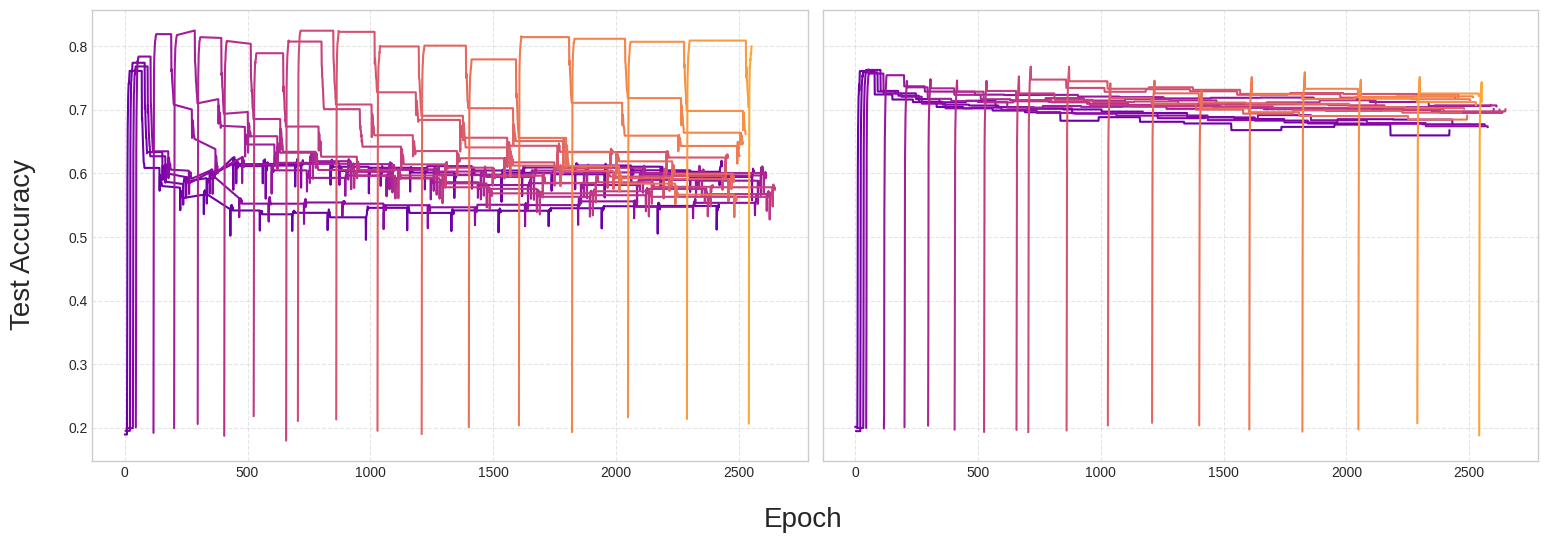

In [32]:
max_task = 19

colors = get_magma_colors(max_task+1)

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2, sharex=True, sharey=True)

plot(df_mono, max_task, ax[0], title="monolithic")
plot(df_mod, max_task, ax[1], title="modular")


fig.text(-0.02, 0.5, "Test Accuracy", ha='center', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, -0.05, 'Epoch', ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.savefig("Figures/grad/divergence.pdf", bbox_inches='tight')
plt.show()


# add colorbar
# cmap = matplotlib.colors.ListedColormap(colors)
# bounds = np.arange(0, max_task+1)
# norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ticks=bounds, boundaries=bounds, spacing='proportional', orientation='horizontal')
# cbar.ax.set_xticklabels([str(i) for i in range(max_task+1)])
# cbar.set_label("test task", rotation=0, labelpad=20)